In [3]:
import os, cv2, random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from random import shuffle 
from IPython.display import SVG

import tensorflow as tf
from keras.utils import model_to_dot
from keras.utils import plot_model
from keras.applications import ResNet50, Xception
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
%matplotlib inline 

In [4]:
PATH = '/kaggle/input/dogs-vs-cats-redux-kernels-edition/'

In [5]:
train_image_zip = f'{PATH}/train.zip'
test_image_zip = f'{PATH}/test.zip'

Use zipfile to unzip the train and test zip.

In [6]:
import zipfile
with zipfile.ZipFile(train_image_zip,"r") as z:
    z.extractall(".")
with zipfile.ZipFile(test_image_zip,"r") as z:
    z.extractall(".")

In [7]:
train_image = os.listdir('./train/')
test_image = os.listdir('./test/')

Reading all the training data in, along with theri labels

In [8]:
img_size = 224
train_img_data = []

for name in train_image:
    path = os.path.join('./train/', name)
    label = [1,0] if name.split('.')[0] == 'cat' else [0,1]
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (img_size, img_size))
    train_img_data.append([np.array(img),np.array(label)])

shuffle(train_img_data)


Set X and y

In [9]:
X = np.array([data[0] for data in train_img_data]).reshape(-1,img_size,img_size,3)
y = np.array([data[1] for data in train_img_data])

Now I try using ResNet50 and Xception transfer learning.  
Tried using different pooling.

In [14]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
# model.add(Xception(include_top=False, pooling='avg', weights="imagenet"))
model.add(Dense(2, activation='softmax'))

model.layers[0].trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [15]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# model.summary()

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
BATCH_SIZE = 32
NO_EPOCHS = 10
model_history = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/10
547/547 [==============================] - 42s 76ms/step - loss: 0.0459 - accuracy: 0.9830 - val_loss: 0.0372 - val_accuracy: 0.9865
Epoch 2/10
547/547 [==============================] - 41s 76ms/step - loss: 0.0389 - accuracy: 0.9855 - val_loss: 0.0363 - val_accuracy: 0.9867
Epoch 3/10
547/547 [==============================] - 41s 75ms/step - loss: 0.0354 - accuracy: 0.9869 - val_loss: 0.0387 - val_accuracy: 0.9852
Epoch 4/10
547/547 [==============================] - 41s 76ms/step - loss: 0.0324 - accuracy: 0.9884 - val_loss: 0.0349 - val_accuracy: 0.9860
Epoch 5/10
547/547 [==============================] - 41s 76ms/step - loss: 0.0300 - accuracy: 0.9889 - val_loss: 0.0345 - val_accuracy: 0.9872
Epoch 6/10
547/547 [==============================] - 41s 76ms/step - loss: 0.0286 - accuracy: 0.9899 - val_loss: 0.0350 - val_accuracy: 0.9863
Epoch 7/10
547/547 [==============================] - 41s 76ms/step - loss: 0.0267 - accuracy: 0.9911 - val_loss: 0.0354 - val_accuracy:

In [ ]:
# train_model.history

Draw out the training and validation accuracy and loss below.

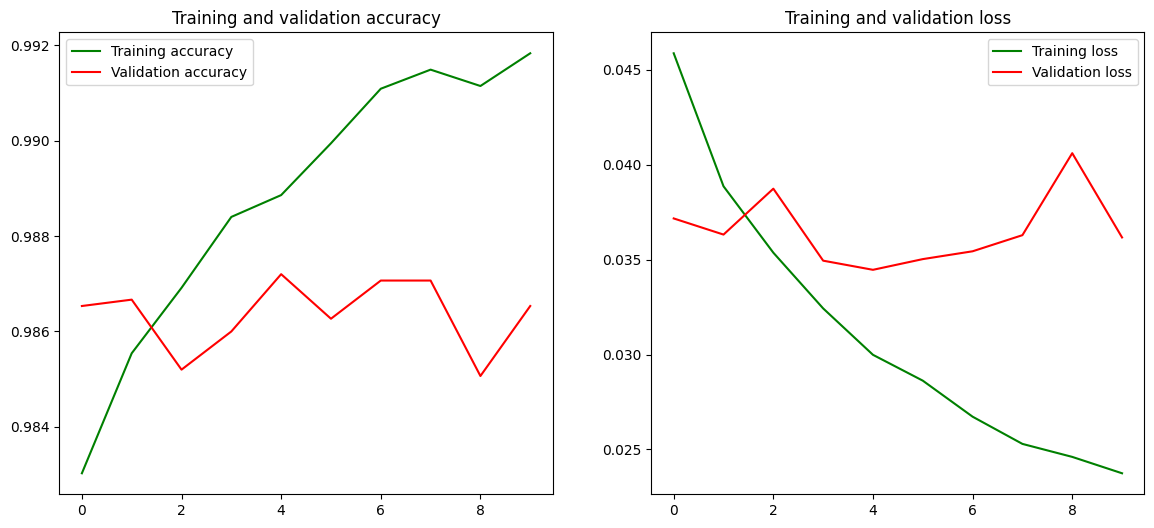

In [19]:

history = model_history.history
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(accuracy))

f, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].plot(epochs, accuracy, 'g', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'r', label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

ax[1].plot(epochs, loss, 'g', label='Training loss')
ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()
plt.show()

In [ ]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

In [20]:
test_img_data = []

for name in test_image:
    path = os.path.join('./test/', name)
    label = name.split('.')[0]
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (img_size, img_size))
    test_img_data.append([np.array(img),np.array(label)])

shuffle(test_img_data)

In [ ]:
# model

In [ ]:
from tqdm.auto import tqdm

pred_list = []
img_list = []
for img in tqdm(test_img_data, position=0, leave=True):
    img_data = img[0]
    img_idx = img[1]
    data = img_data.reshape(-1,img_size,img_size,3)
    predicted = model.predict([data],verbose = 0)[0]
    img_list.append(img_idx)
    pred_list.append(predicted[1])

In [ ]:
submission = pd.DataFrame({'id':img_list , 'label':pred_list})
submission.head()
submission.to_csv("submission.csv", index=False)